In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
import mds
import xarray as xr
import xmitgcm
import seaborn as sns
import cmocean
import sys
import os
from IPython import display
import time
import xesmf as xe


In [2]:
import xgcm

In [3]:
plt.rcParams.update({'font.size': 16
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 16,
      'legend.fontsize' : 14,'legend.handlelength': 3})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
plt.rcParams.update({'figure.figsize' : (14,6)})


In [4]:
dir_llc270 = '/central/groups/oceanphysics/anirban/llc270_2008_2009'
ds_llc270 =  xmitgcm.open_mdsdataset(dir_llc270,iters='all',geometry='llc',default_dtype='>f4')

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/llc270_2008_2009. Using default version.
  "in %s. Using default version." % data_dir)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/llc270_2008_2009. Using default version.
  "in %s. Using default version." % data_dir)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/llc270_2008_2009. Using default version.
  "in %s. Using default version." % data_dir)
/central/groups/oceanphysics/an

In [5]:
ds_llc270

<xarray.Dataset>
Dimensions:   (face: 13, i: 270, i_g: 270, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 24)
Coordinates:
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i_g       (i_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j_g       (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * face      (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    iter      (time) int64 dask.array<shape=(24,), chunksize=(1,)>
  * time      (time) int64 423000 425088 427320 429480 ... 469008 471168 473400
    XC        (face, j,

In [6]:
XCfull = np.zeros((270,540))
XCfull[:,0:270] = np.rot90(ds_llc270.XC.sel(face=10).values)
XCfull[:,270:540] = ds_llc270.XC.sel(face=2).values

YCfull = np.zeros((270,540))
YCfull[:,0:270] = np.rot90(ds_llc270.YC.sel(face=10).values)
YCfull[:,270:540] = ds_llc270.YC.sel(face=2).values

XGfull = np.zeros((270,540))
XGfull[:,0:270] = np.rot90(ds_llc270.XG.sel(face=10).values)
XGfull[:,270:540] = ds_llc270.XG.sel(face=2).values

YGfull = np.zeros((270,540))
YGfull[:,0:270] = np.rot90(ds_llc270.YG.sel(face=10).values)
YGfull[:,270:540] = ds_llc270.YG.sel(face=2).values


In [7]:
fold = open('/central/groups/oceanphysics/anirban/NA/inputfiles/NA_2160/NA_2160/input_ll1815/delYFile', 'rb')
delYold1815 = np.fromfile(fold, '>f4')
delYold1815.shape

(532,)

In [8]:
idy = (np.where((YGfull[:,-2]>=26.855293273925781) & (YGfull[:,-2]<np.sum(delYold1815)+ 26.855293273925781))[0])
YGsmall=YGfull[idy,:]
YCsmall=YCfull[idy,:]
idx = (np.where((XGfull[2,:]>=-81.583335876464844) & (XGfull[2,:]<-81.583335876464844+0.041666666666667*1815))[0])
XGsmall=XGfull[:,idx]
XCsmall=XCfull[:,idx]
xc = XCsmall[idy]
yc = YCsmall[:,idx]
xg = XGsmall[idy]
yg = YGsmall[:,idx]
xc.shape, yc.shape, xg.shape, yg.shape

((67, 227), (67, 227), (67, 227), (67, 227))

In [9]:
xc.min(), xc.max()

(-81.16666412353516, -5.833333492279053)

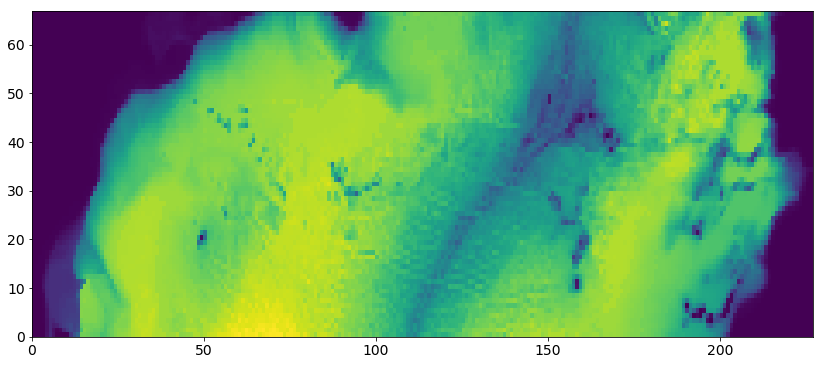

In [10]:
depthfull = np.zeros((270,540))
depthfull[:,0:270] = np.rot90(ds_llc270.Depth.sel(face=10).values)
depthfull[:,270:540] = ds_llc270.Depth.sel(face=2).values
depth = depthfull[idy,:][:,idx]
plt.pcolormesh(depth)

In [11]:
z = ds_llc270.Z.values

In [12]:
times = ds_llc270.time.values

In [13]:
Saltfull = np.ma.zeros((50,270,540))


Salt = Saltfull[:,idy][:,:,idx]

Thetafull = np.ma.zeros((50,270,540))


Theta = Thetafull[:,idy][:,:,idx]


In [241]:
Saltfull = np.zeros((50,270,540))

Saltfull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacC).isel(time=0).SALT.sel(face=10).values, 1, (1,2))
Saltfull[:,:,270:540] =  ds_llc270.where(ds_llc270.hFacC).isel(time=0).SALT.sel(face=2).values

#Saltfull[:,:,0:270] =  np.rot90(ds_llc270.isel(time=0).SALT.sel(face=10).values, 1, (1,2))
#Saltfull[:,:,270:540] =  ds_llc270.isel(time=0).SALT.sel(face=2).values

Salt = Saltfull[:,idy][:,:,idx]

Thetafull = np.ma.zeros((50,270,540))

Thetafull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacC).isel(time=0).THETA.sel(face=10).values, 1, (1,2))
Thetafull[:,:,270:540] =  ds_llc270.where(ds_llc270.hFacC).isel(time=0).THETA.sel(face=2).values

#Thetafull[:,:,0:270] =  np.rot90(ds_llc270.isel(time=0).THETA.sel(face=10).values, 1, (1,2))
#Thetafull[:,:,270:540] =  ds_llc270.isel(time=0).THETA.sel(face=2).values

Theta = Thetafull[:,idy][:,:,idx]


/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 24
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 24
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  

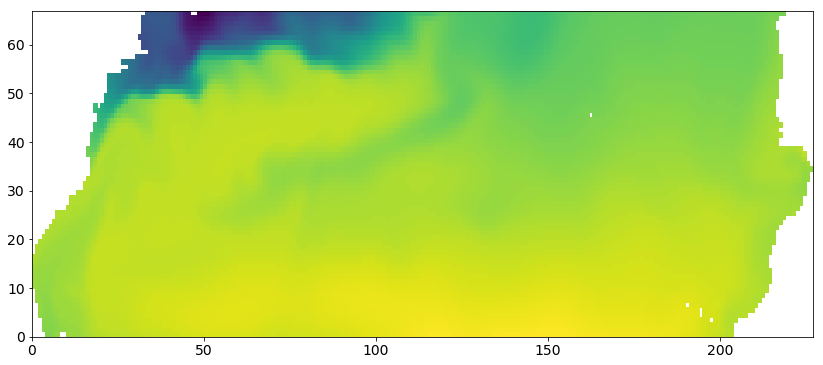

In [15]:
plt.pcolormesh(Salt[0])

In [17]:
yorigin = 26.855293273925781
xorigin = -81.583335876464844
ygr = yorigin + np.cumsum(delYold1815)
ygl = yorigin*np.ones_like(delYold1815)
ygl[1:] = ygr[:-1]
YC = 0.5*(ygl+ygr)
#xgl = np.arange(xorigin, xorigin+0.041666666666667*1815, 0.041666666666667)
XC = np.arange(xorigin+0.041666666666667/2, xorigin+0.041666666666667*1815, 0.041666666666667)

In [18]:
yc.shape

(67, 227)

In [20]:
idy = (np.where((YGfull[:,-2]>=26.855293273925781) & (YGfull[:,-2]<np.sum(delYold1815)+ 26.855293273925781))[0])
YGsmall=YGfull[idy,:]
YCsmall=YCfull[idy,:]
idx = (np.where((XGfull[2,:]>=-81.583335876464844) & (XGfull[2,:]<-81.583335876464844+0.041666666666667*1815))[0])
XGsmall=XGfull[:,idx]
XCsmall=XCfull[:,idx]
xc = XCsmall[idy]
yc = YCsmall[:,idx]
xg = XGsmall[idy]
yg = YGsmall[:,idx]

yorigin = 26.855293273925781
xorigin = -81.583335876464844
ygr = yorigin + np.cumsum(delYold1815)
ygl = yorigin*np.ones_like(delYold1815)
ygl[1:] = ygr[:-1]
YC = 0.5*(ygl+ygr)
#xgl = np.arange(xorigin, xorigin+0.041666666666667*1815, 0.041666666666667)
XC = np.arange(xorigin+0.041666666666667/2, xorigin+0.041666666666667*1815, 0.041666666666667)

x = xc
y = yc
x_fine, y_fine = np.meshgrid(XC,YC)

Salt[0].shape, x.shape, y.shape, x_fine.shape, y_fine.shape


((67, 227), (67, 227), (67, 227), (532, 1815), (532, 1815))

In [21]:
from scipy.interpolate import griddata

zz = Salt[0]

x=x.ravel()
x=(x[x!=np.isnan])
y=y.ravel()
y=(y[y!=np.isnan])
zz=zz.ravel()
zz=(zz[zz!=np.isnan])

Saltnew = griddata((x, y), zz, (XC[None,:], YC[:,None]), method='linear')


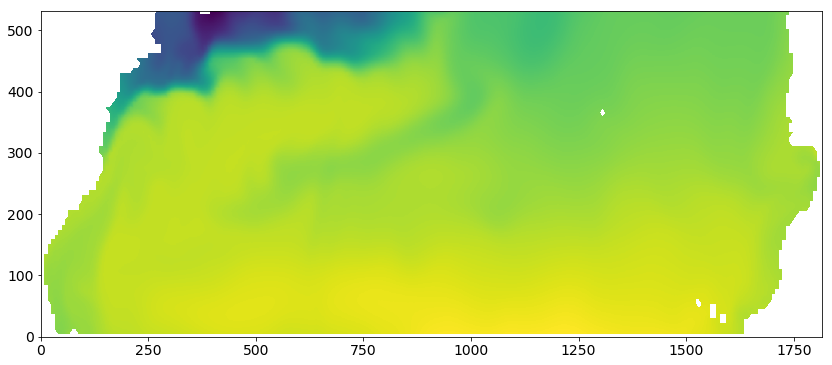

In [23]:
plt.pcolormesh(Saltnew)

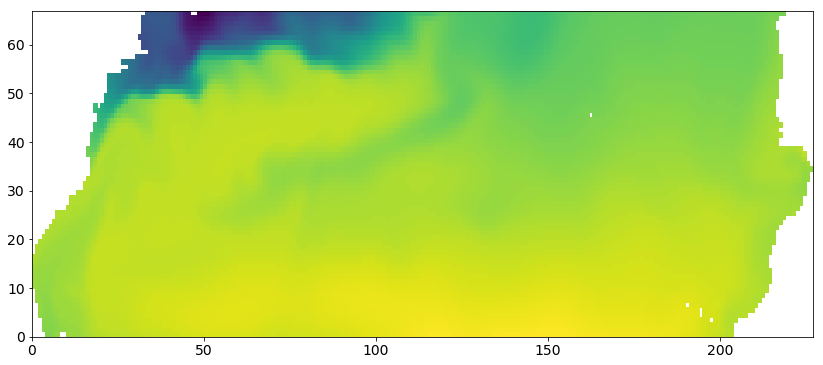

In [22]:
plt.pcolormesh(Salt[0])

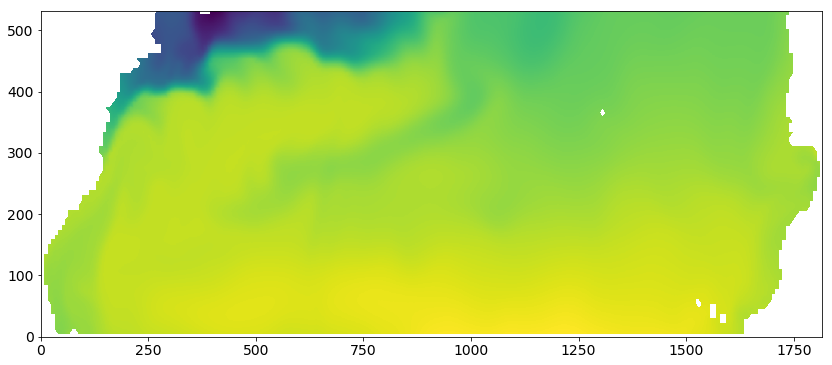

In [156]:
plt.pcolormesh(Saltnew)

In [36]:
idy = (np.where((YGfull[:,-2]>=26.855293273925781) & (YGfull[:,-2]<np.sum(delYold1815)+ 26.855293273925781))[0])
YGsmall=YGfull[idy,:]
YCsmall=YCfull[idy,:]
idx = (np.where((XGfull[2,:]>=-81.583335876464844) & (XGfull[2,:]<-81.583335876464844+0.041666666666667*1815))[0])
XGsmall=XGfull[:,idx]
XCsmall=XCfull[:,idx]
xc = XCsmall[idy]
yc = YCsmall[:,idx]
xg = XGsmall[idy]
yg = YGsmall[:,idx]

yorigin = 26.855293273925781
xorigin = -81.583335876464844
ygr = yorigin + np.cumsum(delYold1815)
ygl = yorigin*np.ones_like(delYold1815)
ygl[1:] = ygr[:-1]
YC = 0.5*(ygl+ygr)
#xgl = np.arange(xorigin, xorigin+0.041666666666667*1815, 0.041666666666667)
XC = np.arange(xorigin+0.041666666666667/2, xorigin+0.041666666666667*1815, 0.041666666666667)

x = xc
y = ycå
x_fine, y_fine = np.meshgrid(XC,YC)

Salt[0].shape, x.shape, y.shape, x_fine.shape, y_fine.shape


((67, 227), (67, 227), (67, 227), (532, 1815), (532, 1815))

In [32]:
xc[10].shape, yc[:,128].shape

((227,), (67,))

In [46]:
saltsurf = Salt[0]
x_masked = np.where(saltsurf!=np.nan, [x, saltsurf])

ValueError: either both or neither of x and y should be given

In [51]:
saltsurf

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [58]:
x_nan = np.nan*np.ones_like(x)
x_nan[salt_masked.mask!=True] = x

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

In [60]:
x_masked = np.ma.masked_where(salt_masked.mask==True, x)
x_masked

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

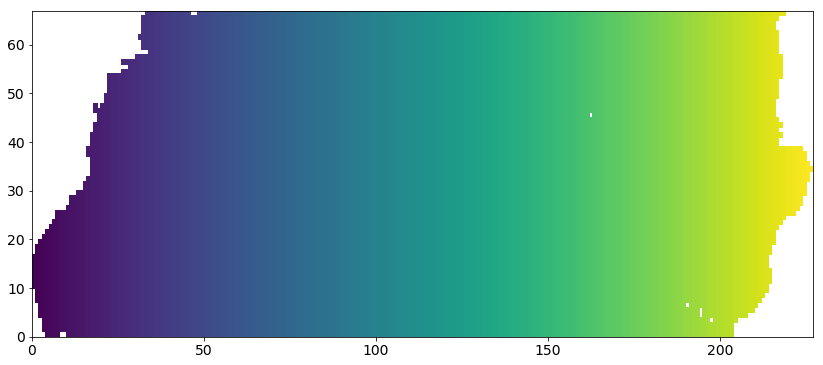

In [61]:
plt.pcolormesh(x_masked)

In [57]:
salt_masked = np.ma.masked_invalid(saltsurf)
salt_masked.mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [62]:
x_masked.ravel()


masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20)

In [70]:
idy = (np.where((YGfull[:,-2]>=26.855293273925781) & (YGfull[:,-2]<np.sum(delYold1815)+ 26.855293273925781))[0])
YGsmall=YGfull[idy,:]
YCsmall=YCfull[idy,:]
idx = (np.where((XGfull[2,:]>=-81.583335876464844) & (XGfull[2,:]<-81.583335876464844+0.041666666666667*1815))[0])
XGsmall=XGfull[:,idx]
XCsmall=XCfull[:,idx]
xc = XCsmall[idy]
yc = YCsmall[:,idx]
xg = XGsmall[idy]
yg = YGsmall[:,idx]

yorigin = 26.855293273925781
xorigin = -81.583335876464844
ygr = yorigin + np.cumsum(delYold1815)
ygl = yorigin*np.ones_like(delYold1815)
ygl[1:] = ygr[:-1]
YC = 0.5*(ygl+ygr)
#xgl = np.arange(xorigin, xorigin+0.041666666666667*1815, 0.041666666666667)
XC = np.arange(xorigin+0.041666666666667/2, xorigin+0.041666666666667*1815, 0.041666666666667)

x = xc
y = yc
x_fine, y_fine = np.meshgrid(XC,YC)

Salt[0].shape, x.shape, y.shape, x_fine.shape, y_fine.shape


((67, 227), (67, 227), (67, 227), (532, 1815), (532, 1815))

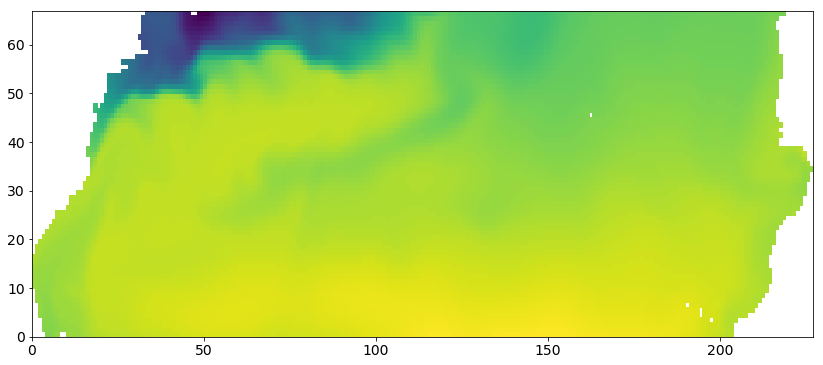

In [72]:
plt.pcolormesh(Salt[0])

In [73]:
from scipy.interpolate import SmoothBivariateSpline

In [87]:
zz = Salt[0]
zz = zz.ravel()
zz=(zz[zz!=np.isnan])
zz.shape

(15209,)

In [86]:
zz[:100]

array([        nan,         nan,         nan,         nan, 36.0228157 ,
       36.0308075 , 36.06285477, 36.21680069,         nan,         nan,
       36.26438522, 36.2752037 , 36.24866486, 36.2481308 , 36.28994751,
       36.36771011, 36.42408752, 36.47124863, 36.51911545, 36.56312561,
       36.59386826, 36.61111069, 36.62063599, 36.62691498, 36.63116455,
       36.63565445, 36.64487457, 36.65895081, 36.67544556, 36.69150925,
       36.70541763, 36.7166748 , 36.72563171, 36.73344803, 36.74061584,
       36.74817657, 36.75584793, 36.76425934, 36.77349854, 36.7836647 ,
       36.79514313, 36.80751419, 36.82070923, 36.83392334, 36.8472023 ,
       36.86072159, 36.87350464, 36.88528061, 36.8956871 , 36.90469742,
       36.91226578, 36.91859436, 36.9238472 , 36.92806625, 36.93115616,
       36.93302917, 36.93375397, 36.93341446, 36.93223572, 36.9301796 ,
       36.92699814, 36.92301178, 36.91764069, 36.9106636 , 36.90203476,
       36.89082336, 36.87752533, 36.8627739 , 36.84861755, 36.83

In [88]:
zz = Salt[0,:50,:50]
zz = zz.ravel()
zz=(zz[zz!=np.isnan])
zz.shape

(2500,)

In [103]:
zz = Salt[0,:50,:50]
zz=zz.ravel()
zz1 = zz[~np.isnan(zz)]
zz1.shape

(2045,)

In [102]:
zz1

array([ True,  True,  True, ..., False, False, False])

In [105]:
zz = Salt[0,:50,:50]
zz=zz.ravel()
z1=(zz[~np.isnan(zz)])
xx = x[:50,:50]
xx=xx.ravel()
x1=(xx[~np.isnan(zz)])
yy = y[:50,:50]
yy=yy.ravel()
y1=(yy[~np.isnan(zz)])

print(xx.shape, yy.shape, zz.shape, x1.shape, y1.shape, z1.shape)

(2500,) (2500,) (2500,) (2045,) (2045,) (2045,)


In [92]:
from scipy.interpolate import Rbf

In [106]:
fS = Rbf(x1,y1,z1)
#Salt_new = fS(xc[10,0:50], yc[0:50,128])

In [110]:
Salt_new = fS(xc[10,0:50], yc[0:50,128])
Salt_new.shape

(50,)

In [115]:
zz = Salt[0]
zz=zz.ravel()
z1=(zz[~np.isnan(zz)])
xx = x
xx=xx.ravel()
x1=(xx[~np.isnan(zz)])
yy = y
yy=yy.ravel()
y1=(yy[~np.isnan(zz)])

print(xx.shape, yy.shape, zz.shape, x1.shape, y1.shape, z1.shape)

(15209,) (15209,) (15209,) (13594,) (13594,) (13594,)


In [122]:
x[10].shape

(227,)

In [132]:
fS = RectBivariateSpline(x1,y1,z1)

Salt_new=np.transpose(fS(xc[10], yc[:,128]))

ValueError: x must be strictly increasing

In [140]:
fS = SmoothBivariateSpline(x1,y1,z1,kx=2,ky=2)

Salt_new=np.transpose(fS(xc[10], yc[:,128]))

In [141]:
Salt_new.shape

(67, 227)

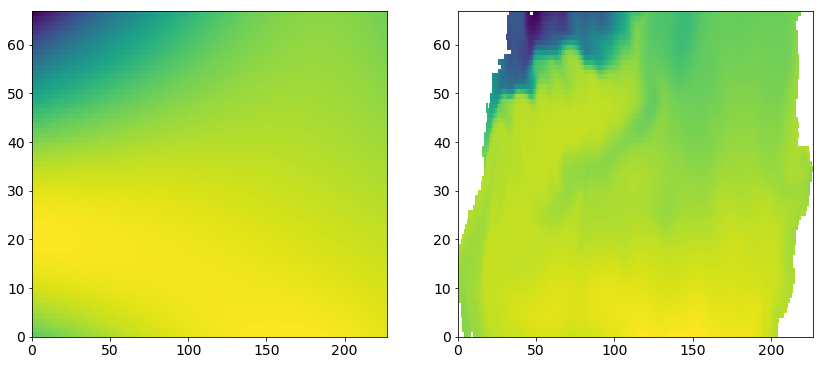

In [142]:
plt.subplot(121)
plt.pcolormesh(Salt_new)
plt.subplot(122)
plt.pcolormesh(Salt[0])

In [120]:
from scipy.interpolate import RectBivariateSpline, RegularGridInterpolator, interpn

In [131]:
fs1 = RegularGridInterpolator(y[:,10], x[10], Salt[0], bounds_error=False, fill_value=None)

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:2406: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if method not in ["linear", "nearest"]:


ValueError: Method '[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]' is not defined

In [130]:
x[10].shape

(227,)

In [26]:
ds_sal = xr.DataArray(Salt, coords={'Z': z,'lat': yc.mean(axis=1), 'lon': xc.mean(axis=0),},
             dims=['Z', 'lat','lon']).to_dataset(name='Salt')
ds_theta = xr.DataArray(Theta, coords={'Z': z,'lat': yc.mean(axis=1), 'lon': xc.mean(axis=0),},
             dims=['Z', 'lat','lon']).to_dataset(name='Theta')
ds_new = xr.merge([ds_sal,ds_theta])

In [27]:
ds_new

<xarray.Dataset>
Dimensions:  (Z: 50, lat: 67, lon: 227)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
  * lat      (lat) float64 27.06 27.33 27.6 27.88 ... 42.85 43.08 43.3 43.53
  * lon      (lon) float64 -81.17 -80.83 -80.5 -80.17 ... -6.5 -6.167 -5.833
Data variables:
    Salt     (Z, lat, lon) float64 0.0 0.0 0.0 0.0 36.02 ... 0.0 0.0 0.0 0.0 0.0
    Theta    (Z, lat, lon) float64 0.0 0.0 0.0 0.0 24.95 ... 0.0 0.0 0.0 0.0 0.0

In [28]:
ddir0 = '/central/groups/oceanphysics/anirban/NA/experiments/run_ll1815_04'
ds_2 = xmitgcm.open_mdsdataset(ddir0,iters=None,default_dtype='>f4')

In [29]:
ds_2

<xarray.Dataset>
Dimensions:  (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100, Zl: 100, Zp1: 101, Zu: 100)
Coordinates:
  * XC       (XC) >f4 -81.5625 -81.520836 -81.47917 -81.4375 ... 0.0 0.0 0.0 0.0
  * YC       (YC) >f4 26.87238 26.906544 26.9407 26.974846 ... 0.0 0.0 0.0 0.0
  * XG       (XG) >f4 -81.583336 -81.54167 -81.5 -81.458336 ... 0.0 0.0 0.0 0.0
  * YG       (YG) >f4 26.855293 26.889463 26.923624 26.957775 ... 0.0 0.0 0.0
  * Z        (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * Zp1      (Zp1) >f4 0.0 -5.0 -10.0 -15.0 ... -5678.0 -5903.38 -6134.5
  * Zu       (Zu) >f4 -5.0 -10.0 -15.0 -20.0 ... -5678.0 -5903.38 -6134.5
  * Zl       (Zl) >f4 0.0 -5.0 -10.0 -15.0 ... -5244.5 -5458.37 -5678.0 -5903.38
    rA       (YC, XC) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    dxG      (YG, XC) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    dyG      (YC, XG) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    Depth    (YC, XC) >f

In [46]:
x_fine = ds_2.XC
z_fine = ds_2.Z
y_fine = ds_2.YC
x = ds_new.lon.values
z = ds_new.Z.values
y = ds_new.lat.values
Salt_N = ds_new.Salt.isel(lat=-2).values
Salt_S = ds_new.Salt.isel(lat=2).values
Salt_surf = ds_new.Salt.isel(Z=0).values

In [47]:
from scipy import interpolate


In [58]:
np.shape(np.arange(-81.583335876464844, -81.583335876464844+0.041666666666667*1815, 0.041666666666667))

(1815,)

In [77]:
xar = np.arange(-81.583335876464844, -81.583335876464844+0.041666666666667*1815, 0.041666666666667)
xlin = np.linspace(-81.583335876464844, -81.583335876464844+0.041666666666667*1815, 1815)

In [54]:
-81.583335876464844+0.041666666666667*1815

-5.958335876464247

In [74]:
ds_2

<xarray.Dataset>
Dimensions:  (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100, Zl: 100, Zp1: 101, Zu: 100)
Coordinates:
  * XC       (XC) >f4 -81.5625 -81.520836 -81.47917 -81.4375 ... 0.0 0.0 0.0 0.0
  * YC       (YC) >f4 26.87238 26.906544 26.9407 26.974846 ... 0.0 0.0 0.0 0.0
  * XG       (XG) >f4 -81.583336 -81.54167 -81.5 -81.458336 ... 0.0 0.0 0.0 0.0
  * YG       (YG) >f4 26.855293 26.889463 26.923624 26.957775 ... 0.0 0.0 0.0
  * Z        (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * Zp1      (Zp1) >f4 0.0 -5.0 -10.0 -15.0 ... -5678.0 -5903.38 -6134.5
  * Zu       (Zu) >f4 -5.0 -10.0 -15.0 -20.0 ... -5678.0 -5903.38 -6134.5
  * Zl       (Zl) >f4 0.0 -5.0 -10.0 -15.0 ... -5244.5 -5458.37 -5678.0 -5903.38
    rA       (YC, XC) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    dxG      (YG, XC) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    dyG      (YC, XG) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    Depth    (YC, XC) >f

In [84]:
xlin[::-1][160:170]

array([-12.62867766, -12.6703673 , -12.71205693, -12.75374657,
       -12.79543621, -12.83712584, -12.87881548, -12.92050512,
       -12.96219475, -13.00388439])

In [ ]:
xar = np.arange(-81.583335876464844, -81.583335876464844+0.041666666666667*1815, 0.041666666666667)


In [91]:
xar[0]

-81.58333587646484

In [85]:
xar[::-1][160:170]

array([-12.66666921, -12.70833588, -12.75000254, -12.79166921,
       -12.83333588, -12.87500254, -12.91666921, -12.95833588,
       -13.00000254, -13.04166921])

In [94]:
(ds_2.XG.values - np.roll(ds_2.XG.values,1))[1:-200]

array([0.04166412, 0.04167175, 0.04166412, ..., 0.04166698, 0.04166603,
       0.04166698], dtype=float32)

In [97]:
ds_2.XC.min()

<xarray.DataArray 'XC' ()>
array(-81.5625, dtype=float32)

In [90]:
ds_2.XG.values[0]

-81.583336

In [86]:
ds_2.XG[::-1][160:170].values

array([  0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
       -12.875003, -12.916669, -12.958336, -13.000003, -13.041669],
      dtype=float32)

In [48]:
fN = interpolate.interp2d(x,z, Salt_N, kind='linear')
fS = interpolate.interp2d(x,z, Salt_S, kind='linear')
fSurf = interpolate.interp2d(x,y, Salt_surf, kind='linear')

In [49]:
Salt_N_fine = fN(x_fine, z_fine)
Salt_S_fine = fS(x_fine, z_fine)
Salt_surf_fine = fSurf(x_fine, y_fine)


In [34]:
Salt_N_fine.shape

(100, 1815)

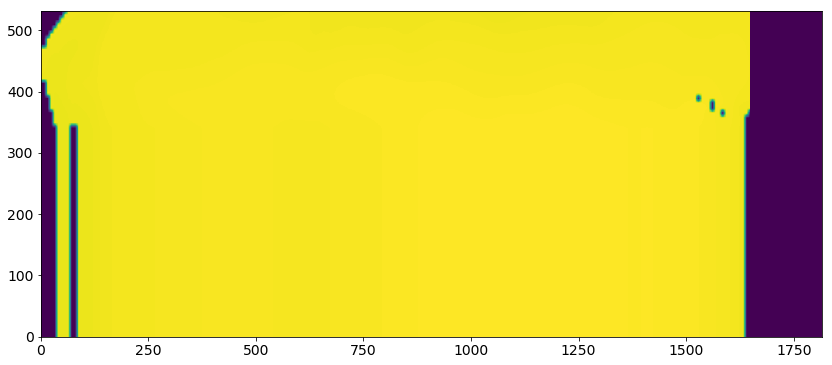

In [51]:
plt.pcolormesh(Salt_surf_fine)

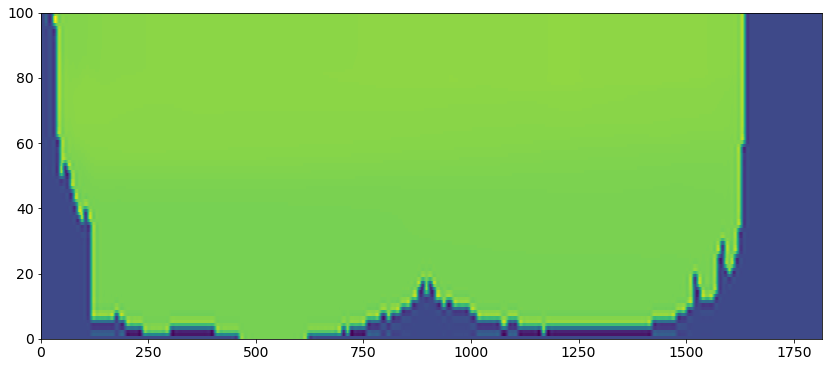

In [36]:
plt.pcolormesh(Salt_S_fine)

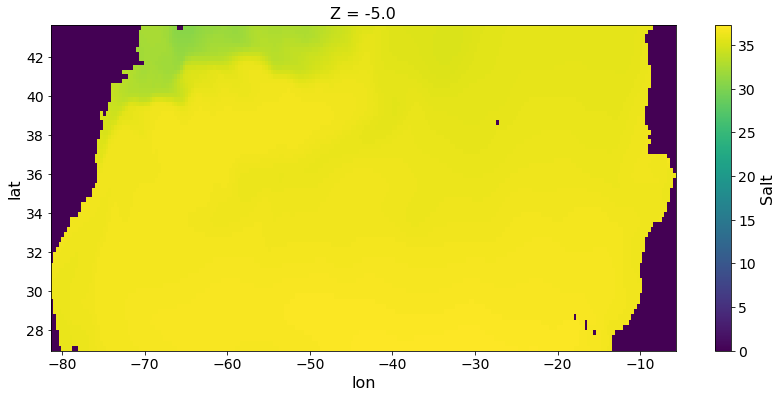

In [38]:
ds_sal.Salt.isel(Z=0).plot()

In [146]:
[M,N] = saltsurf.shape

In [154]:
np.arange(M)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])

In [157]:
a,b = np.meshgrid(np.arange(N),np.arange(M))
a.shape

(227, 67)

In [160]:
y = np.nan*np.ones((M,N))

In [161]:
y.shape

(67, 227)

In [169]:
np.fix(N/2)

113.0

In [182]:
x[]

array([[36.19761355, 36.19761355, 36.19761355, ..., 36.19761355,
        36.19761355, 36.19761355],
       [36.19761355, 36.19761355, 36.19761355, ..., 36.19761355,
        36.19761355, 36.19761355],
       [36.19761355, 36.19761355, 36.19761355, ..., 36.19761355,
        36.19761355, 36.19761355],
       ...,
       [36.19761355, 36.19761355, 36.19761355, ..., 36.19761355,
        36.19761355, 36.19761355],
       [36.19761355, 36.19761355, 36.19761355, ..., 36.19761355,
        36.19761355, 36.19761355],
       [36.19761355, 36.19761355, 36.19761355, ..., 36.19761355,
        36.19761355, 36.19761355]])

In [181]:
i = 10
w = np.zeros((m,n))
w[max((mc-i),0):min((mc+i),m),max((nc-i),0):min((nc+i),n)] = np.ones()
max((mc-i),1)
min((mc+i),m)

44.0

In [201]:
w = np.zeros((100,200))
w[40:60,30:60] = 1

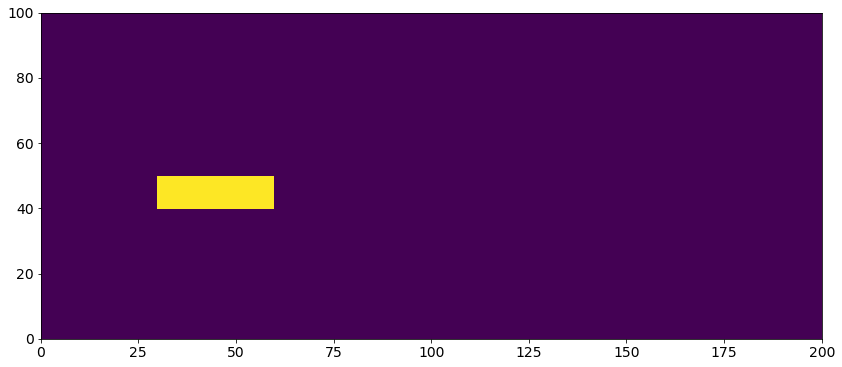

In [202]:
plt.pcolormesh(w)

In [188]:
len(range(int(max((mc-i),0)),int(min((mc+i),m))))

20

In [203]:
min((nc+i),n)

124.0

In [196]:
max((nc-i),0)

104.0

In [194]:
max((mc-i),0)


np.ones((int(min((mc+i),m) - max((mc-i),0)) , int(min((nc+i),m) - max((nc-i),0)) ))

ValueError: negative dimensions are not allowed

In [239]:
saltsurf=Salt[0]


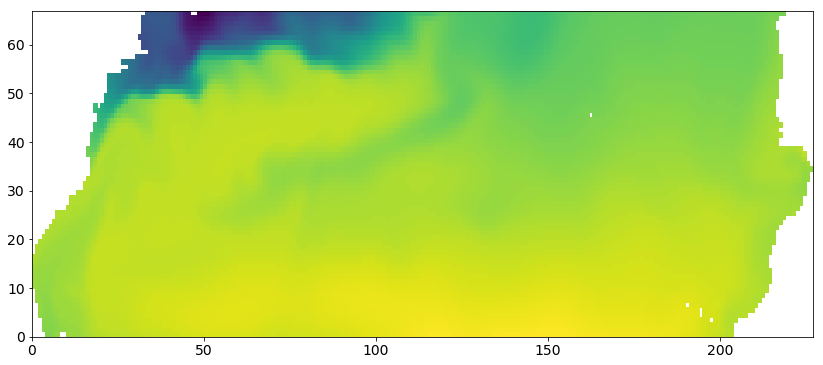

In [232]:
plt.pcolormesh(saltsurf)

In [248]:
ix = np.isnan(saltsurf)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

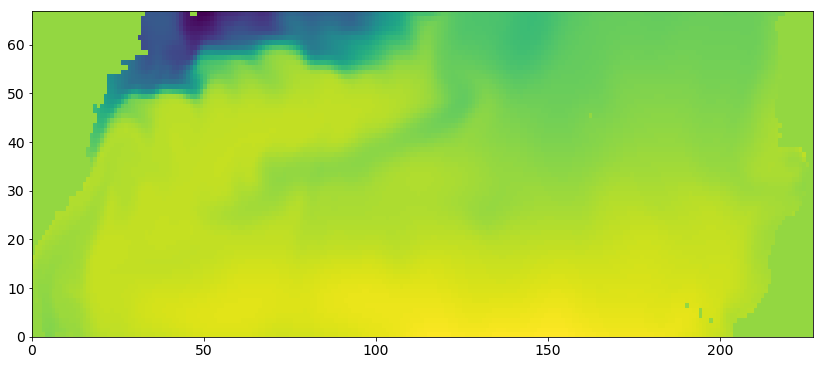

In [250]:
saltsurf = Salt[0]
plt.pcolormesh(saltsurf)

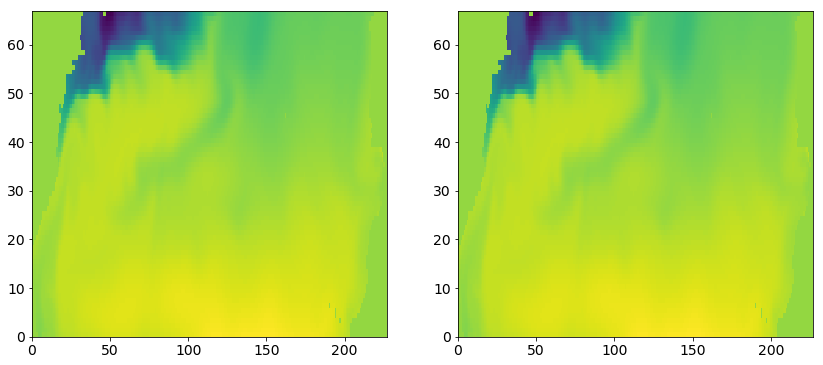

In [247]:
x = saltsurf
x0 = saltsurf
x[np.isnan(x)]=np.nanmean(x)
plt.subplot(121)
plt.pcolormesh(x0);
plt.subplot(122)
plt.pcolormesh(x)

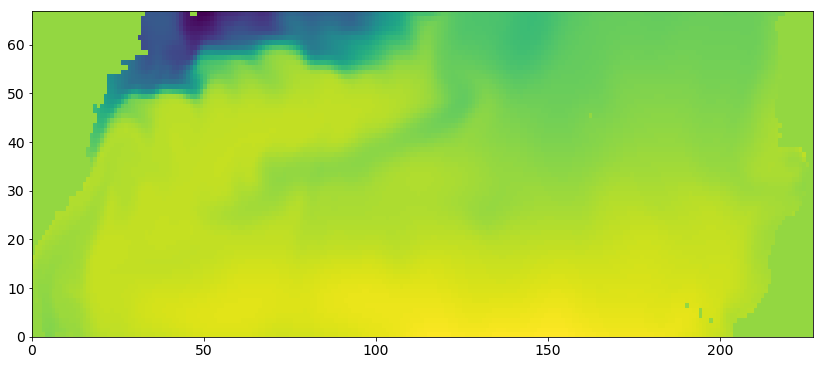

In [238]:
plt.pcolormesh(saltsurf)

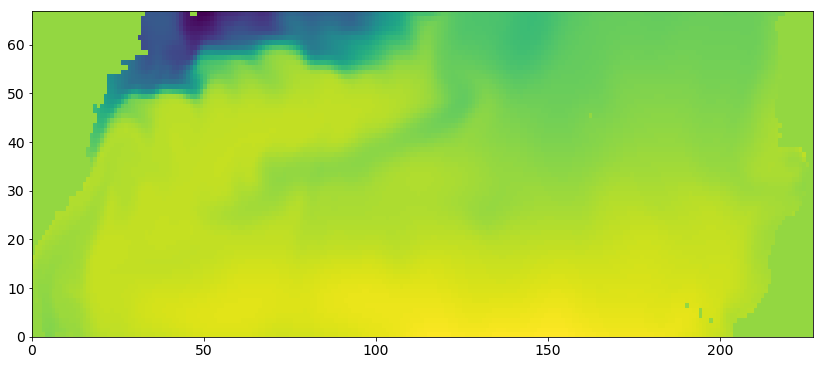

In [237]:
plt.pcolormesh(x)

In [227]:
x = saltsurf
[M,N] = x.shape
y = np.nan*np.ones((M,N)); y[0:M,0:N] = x;
X,Y = np.meshgrid(np.arange(N),np.arange(M))
m = M; n= N
x[np.isnan(x)]=np.nanmean(x)
mc = np.fix(M/2)+1;nc=np.fix(N/2)+1
w=np.zeros((m,n));
maxx=np.max(x); minx=np.min(x);
for i in range(int(max(mc,nc))):
    f=np.fft.fftshift(np.fft.fft2(y));
  

    w[int(max((mc-i),0)):int(min((mc+i),m)),int(max((nc-i),0)):int(min((nc+i),n))] = 1
    f=f*w;
  
  
    f=np.real(np.fft.ifft2(np.fft.ifftshift(f)));
    
    y[np.isnan(saltsurf)]=f[np.isnan(saltsurf)];                       
    y[y>maxx]=maxx;
    y[y<minx]=minx;
    
y=y[:M,:N];

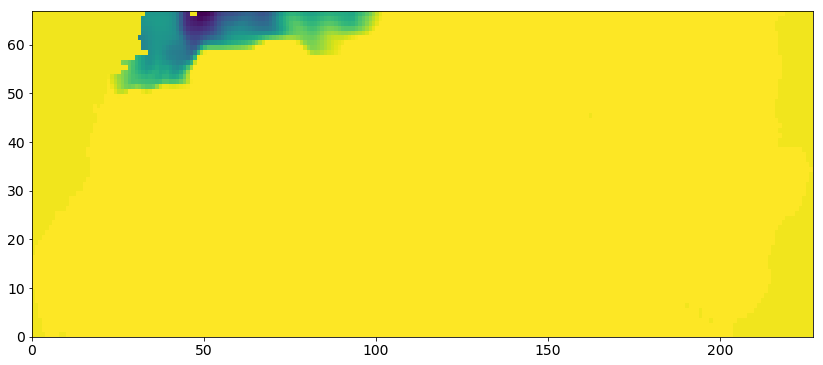

In [229]:
plt.pcolormesh(y)

In [177]:
range(int(max(mc,nc)))

range(0, 114)

In [ ]:
function y=xpolate(x,m,n)

% xpolate(x,m,n)
%             extra/interpolate using tony's 2-D fft method
%             replaces nans in a 2-D array with sensible values
%
%       x     is the 2-D array to be filled
%       m,n   optional arguments to specify size of 2-D fft
%             if n is not specified, n=m;
%             if m and n are not specified, [m n]=size(x);
%
%             the algorithm truncates progressively fewer
%             high frequency components in order to achieve
%             smooth transitions to areas with no data

[M N]=size(x);

if     nargin==2, n=m;
elseif nargin==1, m=M; n=N;
end

y=nan*ones(m,n); y(1:M,1:N)=x;

[X,Y]=meshgrid(1:n,1:m); X=X-1; Y=Y-1; % distance from top left corner
ix=find(isnan(y));                   % location of nans
y(ix)=mmean(x)*ones(size(ix));       % replace nans by mean value
mc=fix(m/2)+1; nc=fix(n/2)+1;        % center value
w=zeros(m,n);
maxx=mmax(x); minx=mmin(x);

for i=1:(max(mc,nc)-1)
  
  % take 2-d fft of y
  
  f=fftshift(fft2(y));
  
  % truncate high frequency

  mx=max((mc-i),1):min((mc+i),m);
  nx=max((nc-i),1):min((nc+i),n);
  w(mx,nx)=ones(length(mx),length(nx));
  f=f.*w;
  
  % map back onto y
  
  f=real(ifft2(ifftshift(f)));       % revert to space domain
  y(ix)=f(ix);                       % replace missing values
  y(find(y>maxx))=maxx;
  y(find(y<minx))=minx;
  
end

y=y(1:M,1:N);
